In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [5]:
cols = ["times_pregnant", "plasma_glucose_conc", "diabp", "skin_thickness", "serum_insulin", "BMI", "dia_ped_func", "age", "class"]

In [7]:
df = pd.read_csv("pima-indians-diabetes.csv", names = cols)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   times_pregnant       768 non-null    int64  
 1   plasma_glucose_conc  768 non-null    int64  
 2   diabp                768 non-null    int64  
 3   skin_thickness       768 non-null    int64  
 4   serum_insulin        768 non-null    int64  
 5   BMI                  768 non-null    float64
 6   dia_ped_func         768 non-null    float64
 7   age                  768 non-null    int64  
 8   class                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


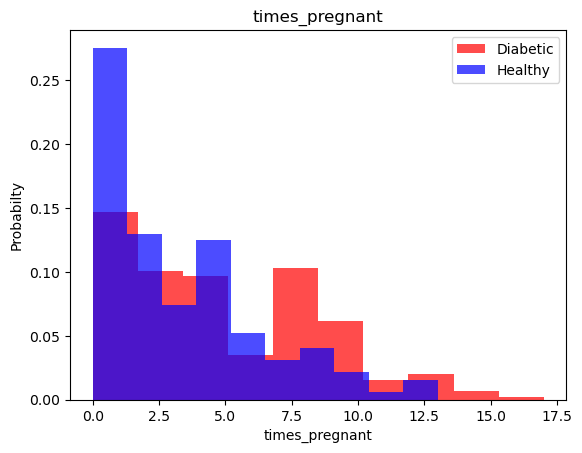

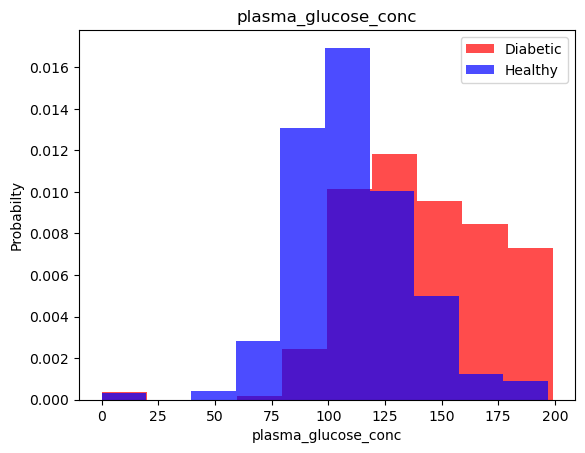

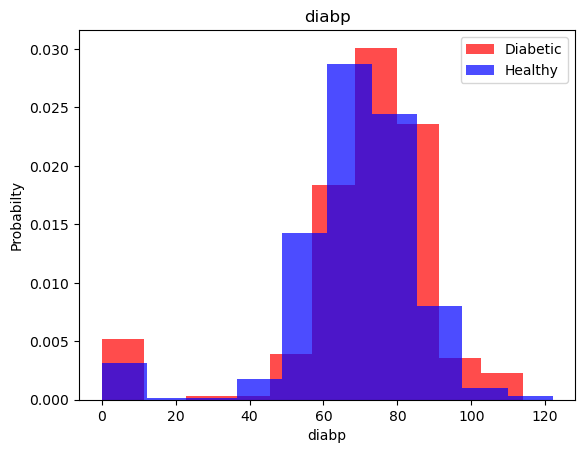

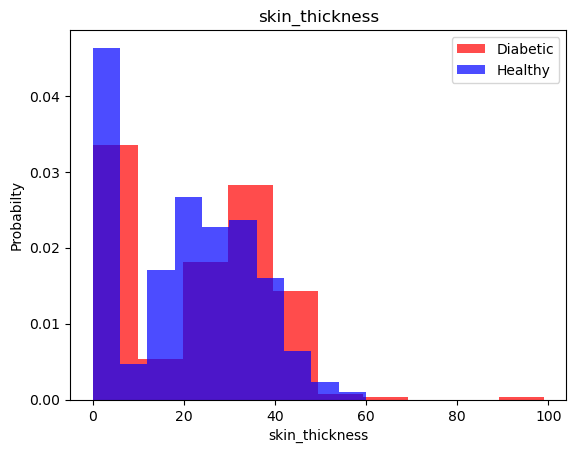

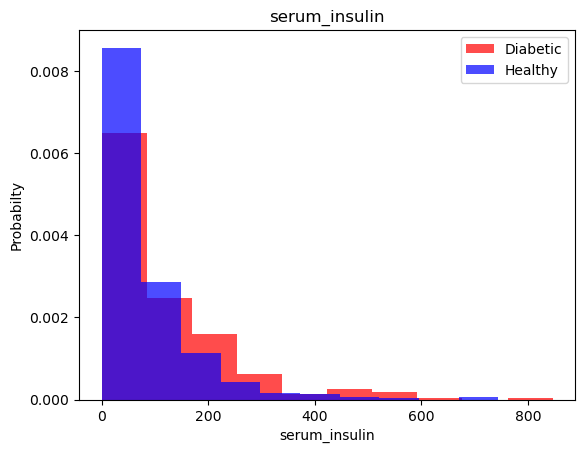

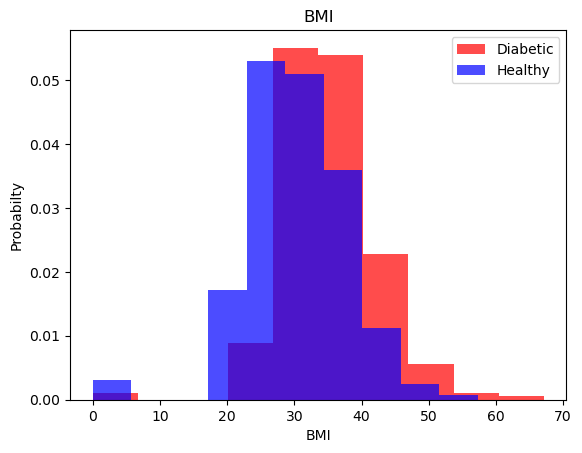

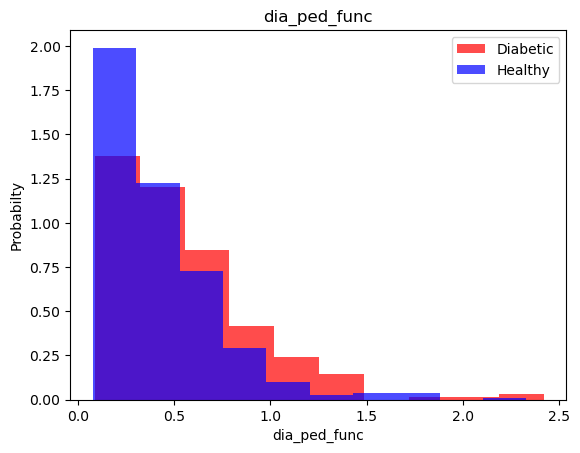

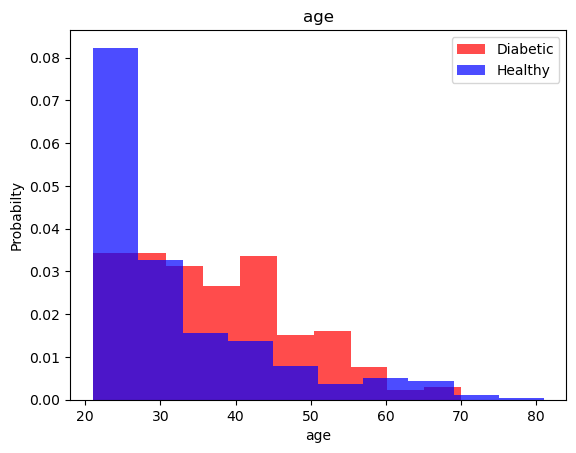

In [11]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color= "red", label = "Diabetic", alpha = 0.7, density = True)
    plt.hist(df[df['class'] == 0][label], color= "blue", label = "Healthy", alpha = 0.7, density = True)
    plt.title(label)
    plt.ylabel("Probabilty")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

In [89]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) # balancing the dataset

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [68]:
print(len(df[df['class']==0]))
print(len(df[df['class']==1]))

500
268


In [82]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

C:\Users\saifm\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [83]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [90]:
# K Nearest Neighbors 
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [93]:
y_pred = knn_model.predict(X_test)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.73      0.79       106
           1       0.56      0.77      0.65        48

    accuracy                           0.74       154
   macro avg       0.72      0.75      0.72       154
weighted avg       0.78      0.74      0.75       154

